# JSON and APIs

_May 19, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API:
    - Github API
    - Yelp API
- Working with JSON files

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

#### Github API
Github API is an example of API that does not need _authentication_. You can send `GET` requests to the API and receive information.  

The `get()` method send a request to Github's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

In [2]:
request = requests.get('https://api.github.com')

In [3]:
## status code
request.status_code

200

In [4]:
# examine the body of the request
request.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sear

In [8]:
# examine the content
type(request.content)

bytes

In [12]:
# examine the headers
request.headers['server']

'GitHub.com'

In [72]:
# we can make use of the JSON library to efficiently load the data and manipulate it 
request_json = json.loads(request.text)

In [ ]:
#json.load() -> load a .json file

#json.loads() -> load a string 

In [75]:
request_json

{'current_user_url': 'https://api.github.com/user',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 'emails_url': 'https://api.github.com/user/emails',
 'emojis_url': 'https://api.github.com/emojis',
 'events_url': 'https://api.github.com/events',
 'feeds_url': 'https://api.github.com/feeds',
 'followers_url': 'https://api.github.com/user/followers',
 'following_url': 'https://api.github.com/user/following{/target}',
 'gists_url': 'https://api.github.com/gists{/gist_id}',
 'hub_url': 'https://api.github.com/hub',
 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}',
 'issues_url': 'https://api.github.com/issues',
 'keys_url': '

In [76]:
# loop through the request_json file and examine the keys 

for key in request_json.keys():
    print(key)

# how do you loop through the keys again?

current_user_url
current_user_authorizations_html_url
authorizations_url
code_search_url
commit_search_url
emails_url
emojis_url
events_url
feeds_url
followers_url
following_url
gists_url
hub_url
issue_search_url
issues_url
keys_url
label_search_url
notifications_url
organization_url
organization_repositories_url
organization_teams_url
public_gists_url
rate_limit_url
repository_url
repository_search_url
current_user_repositories_url
starred_url
starred_gists_url
user_url
user_organizations_url
user_repositories_url
user_search_url


In [77]:
# can you think of a way in which you'd put them in a dataframe?
request_df = pd.DataFrame.from_dict(request_json, orient='index')
request_df.columns = ['url']
request_df.head()

,url
current_user_url,https://api.github.com/user
current_user_authorizations_html_url,https://github.com/settings/connections/applic...
authorizations_url,https://api.github.com/authorizations
code_search_url,https://api.github.com/search/code?q={query}{&...
commit_search_url,https://api.github.com/search/commits?q={query...


#### YELP API
Sometimes you need _authorization_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [78]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [79]:
# check the status code
response.status_code

# what happened here?

400

In [25]:
#You have to use your API key to access the data!

MY_API_KEY = "My Key" # replace this with your API key!
client = Client(MY_API_KEY)

In [80]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

term = 'Axe Throwing'
location = 'Brooklyn'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text)

<Response [200]>
<class 'str'>
{"businesses": [{"id": "4E6BkrEVf_0TjRVYE7gxeQ", "alias": "bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2", "name": "Bury the Hatchet Brooklyn - Axe Throwing", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nwmd13LkntwuzcEPeg/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2?adjust_creative=5senwnEqxeH82m5OZ1q-NQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5senwnEqxeH82m5OZ1q-NQ", "review_count": 140, "categories": [{"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "teambuilding", "title": "Team Building Activities"}], "rating": 4.5, "coordinates": {"latitude": 40.7283195, "longitude": -73.9600679}, "transactions": [], "location": {"address1": "25 Noble St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11222", "country": "US", "state": "NY", "display_address": ["25 Noble St", "Brooklyn, NY 11222"]}, "phone": "+19172439696",

In [28]:
# cleaning and formatting the data
axe_throwing = response.text
axe_throwing = json.loads(axe_throwing)

In [83]:
axe_throwing

{'businesses': [{'id': '4E6BkrEVf_0TjRVYE7gxeQ',
   'alias': 'bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2',
   'name': 'Bury the Hatchet Brooklyn - Axe Throwing',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nwmd13LkntwuzcEPeg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2?adjust_creative=5senwnEqxeH82m5OZ1q-NQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5senwnEqxeH82m5OZ1q-NQ',
   'review_count': 140,
   'categories': [{'alias': 'axethrowing', 'title': 'Axe Throwing'},
    {'alias': 'teambuilding', 'title': 'Team Building Activities'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.7283195, 'longitude': -73.9600679},
   'transactions': [],
   'location': {'address1': '25 Noble St',
    'address2': None,
    'address3': '',
    'city': 'Brooklyn',
    'zip_code': '11222',
    'country': 'US',
    'state': 'NY',
    'display_address': ['25 Noble St', 'Brooklyn, NY 

In [91]:
# cleaning and exploring the data
keys = []
for item in axe_throwing.items():
    print(item)

('businesses', [{'id': '4E6BkrEVf_0TjRVYE7gxeQ', 'alias': 'bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2', 'name': 'Bury the Hatchet Brooklyn - Axe Throwing', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nwmd13LkntwuzcEPeg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2?adjust_creative=5senwnEqxeH82m5OZ1q-NQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5senwnEqxeH82m5OZ1q-NQ', 'review_count': 140, 'categories': [{'alias': 'axethrowing', 'title': 'Axe Throwing'}, {'alias': 'teambuilding', 'title': 'Team Building Activities'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7283195, 'longitude': -73.9600679}, 'transactions': [], 'location': {'address1': '25 Noble St', 'address2': None, 'address3': '', 'city': 'Brooklyn', 'zip_code': '11222', 'country': 'US', 'state': 'NY', 'display_address': ['25 Noble St', 'Brooklyn, NY 11222']}, 'phone': '+19172439696', 'display_phone': '(917) 243-96

In [97]:
for item in axe_throwing['businesses'][0].items():
    print(item)

('id', '4E6BkrEVf_0TjRVYE7gxeQ')
('alias', 'bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2')
('name', 'Bury the Hatchet Brooklyn - Axe Throwing')
('image_url', 'https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nwmd13LkntwuzcEPeg/o.jpg')
('is_closed', False)
('url', 'https://www.yelp.com/biz/bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2?adjust_creative=5senwnEqxeH82m5OZ1q-NQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5senwnEqxeH82m5OZ1q-NQ')
('review_count', 140)
('categories', [{'alias': 'axethrowing', 'title': 'Axe Throwing'}, {'alias': 'teambuilding', 'title': 'Team Building Activities'}])
('rating', 4.5)
('coordinates', {'latitude': 40.7283195, 'longitude': -73.9600679})
('transactions', [])
('location', {'address1': '25 Noble St', 'address2': None, 'address3': '', 'city': 'Brooklyn', 'zip_code': '11222', 'country': 'US', 'state': 'NY', 'display_address': ['25 Noble St', 'Brooklyn, NY 11222']})
('phone', '+19172439696')
('display_phone', '(917) 243-9696'

In [88]:
keys

['businesses', 'total', 'region']

In [89]:
value = axe_throwing[keys[0]]

In [90]:
value

[{'id': '4E6BkrEVf_0TjRVYE7gxeQ',
  'alias': 'bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2',
  'name': 'Bury the Hatchet Brooklyn - Axe Throwing',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nwmd13LkntwuzcEPeg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2?adjust_creative=5senwnEqxeH82m5OZ1q-NQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5senwnEqxeH82m5OZ1q-NQ',
  'review_count': 140,
  'categories': [{'alias': 'axethrowing', 'title': 'Axe Throwing'},
   {'alias': 'teambuilding', 'title': 'Team Building Activities'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.7283195, 'longitude': -73.9600679},
  'transactions': [],
  'location': {'address1': '25 Noble St',
   'address2': None,
   'address3': '',
   'city': 'Brooklyn',
   'zip_code': '11222',
   'country': 'US',
   'state': 'NY',
   'display_address': ['25 Noble St', 'Brooklyn, NY 11222']},
  'phone': '+19172439696

In [36]:
# examine the first element of businesses
axe_throwing['businesses'][0].keys()

dict_keys(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count', 'categories', 'rating', 'coordinates', 'transactions', 'location', 'phone', 'display_phone', 'distance'])

In [38]:
axe_throwing_df = pd.DataFrame.from_dict(axe_throwing['businesses'])
axe_throwing_df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,rating,review_count,transactions,url
0,bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.7283195, 'longitude': -73.9600...",(917) 243-9696,8652.979400,4E6BkrEVf_0TjRVYE7gxeQ,https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nw...,False,"{'address1': '25 Noble St', 'address2': None, ...",Bury the Hatchet Brooklyn - Axe Throwing,+19172439696,4.5,140,[],https://www.yelp.com/biz/bury-the-hatchet-broo...
1,axes-and-arrows-long-island-city-2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.7425127, 'longitude': -73.933816}",(718) 361-9152,9996.588059,PhEkSzYZHKYS7uyXePmkMw,https://s3-media4.fl.yelpcdn.com/bphoto/Uinh_o...,False,"{'address1': '47- 11 Van Dam St', 'address2': ...",Axes And Arrows,+17183619152,4.5,49,[],https://www.yelp.com/biz/axes-and-arrows-long-...
2,kick-axe-throwing-brooklyn-2,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...","{'latitude': 40.6790268, 'longitude': -73.983077}",(833) 542-5293,4733.616620,X0DNGKUQPjf0AfaXfXU2Qg,https://s3-media3.fl.yelpcdn.com/bphoto/y5yMn2...,False,"{'address1': '622 Degraw St', 'address2': None...",Kick Axe Throwing,+18335425293,4.5,397,[],https://www.yelp.com/biz/kick-axe-throwing-bro...
3,tomahawks-jersey-city,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.7411216, 'longitude': -74.0493...",(201) 420-9722,13556.031401,yXOjBSwyqOKDY7oHx3z7HA,https://s3-media1.fl.yelpcdn.com/bphoto/AcR-Ex...,False,"{'address1': '7 Sherman Ave', 'address2': 'Fl ...",Tomahawks,+12014209722,4.5,10,[],https://www.yelp.com/biz/tomahawks-jersey-city...
4,live-axe-new-york,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.71769, 'longitude': -74.00144}",(888) 812-9060,8955.976102,lZVE27r_W_3GXxNwECYC4g,https://s3-media1.fl.yelpcdn.com/bphoto/3s6CqY...,False,"{'address1': '96 Lafayette St', 'address2': No...",Live Axe,+18888129060,5.0,1,[],https://www.yelp.com/biz/live-axe-new-york?adj...
5,stumpys-hatchet-house-fairfield-fairfield-3,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.8824525201793, 'longitude': -7...",(973) 721-3120,39341.674681,wuy6jyi5cxm1pwnUTWyBLw,https://s3-media1.fl.yelpcdn.com/bphoto/yKG858...,False,"{'address1': '373 Us-46 W', 'address2': 'Ste D...",Stumpy's Hatchet House Fairfield - Axe Throwing,+19737213120,5.0,44,[],https://www.yelp.com/biz/stumpys-hatchet-house...
6,bury-the-hatchet-matawan,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.4234040521118, 'longitude': -7...",(732) 962-6284,37446.224761,oKkn9nKh6jB-fsQIDbP4tQ,https://s3-media1.fl.yelpcdn.com/bphoto/EsKEUT...,False,"{'address1': '419 Route 34', 'address2': '', '...",Bury The Hatchet,+17329626284,5.0,88,[],https://www.yelp.com/biz/bury-the-hatchet-mata...
7,bury-the-hatchet-axe-throwing-bloomfield-bloom...,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.79607, 'longitude': -74.2003299}",(973) 842-7725,27173.957271,1BUoVTCYSpGfG0oobAr5Hg,https://s3-media4.fl.yelpcdn.com/bphoto/c7amJN...,False,"{'address1': '672 Bloomfield Ave', 'address2':...",Bury The Hatchet Axe Throwing- Bloomfield,+19738427725,4.5,89,[],https://www.yelp.com/biz/bury-the-hatchet-axe-...
8,bury-the-hatchet-paramus-axe-throwing-paramus-2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.94936, 'longitude': -74.068}",(201) 688-3358,34723.273828,xC9gtq17G9XU5d-yjkprfA,https://s3-media4.fl.yelpcdn.com/bphoto/2z7jvc...,False,"{'address1': '49 E Midland Ave', 'address2': N...",Bury the Hatchet Paramus - Axe Throwing,+12016883358,4.0,77,[],https://www.yelp.com/biz/bury-the-hatchet-para...
9,bury-the-hatchet-woodbridge-axe-throwing-avenel,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.5919, 'longitude': -74.28943}",(732) 298-6614,30245.237229,5izrkxTF_OWgwEdgzjNCAA,https://s3-media2.fl.yelpcdn.com/bphoto/ZhVxhm...,False,"{'address1': '160

In [84]:
axe_throwing_df.sort_values(by = 'review_count')

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,rating,review_count,transactions,url
4,live-axe-new-york,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.71769, 'longitude': -74.00144}",(888) 812-9060,8955.976102,lZVE27r_W_3GXxNwECYC4g,https://s3-media1.fl.yelpcdn.com/bphoto/3s6CqY...,False,"{'address1': '96 Lafayette St', 'address2': No...",Live Axe,+18888129060,5.0,1,[],https://www.yelp.com/biz/live-axe-new-york?adj...
9,bury-the-hatchet-woodbridge-axe-throwing-avenel,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.5919, 'longitude': -74.28943}",(732) 298-6614,30245.237229,5izrkxTF_OWgwEdgzjNCAA,https://s3-media2.fl.yelpcdn.com/bphoto/ZhVxhm...,False,"{'address1': '1600 St Georges Ave', 'address2'...",Bury The Hatchet Woodbridge - Axe Throwing,+17322986614,4.5,6,[],https://www.yelp.com/biz/bury-the-hatchet-wood...
3,tomahawks-jersey-city,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.7411216, 'longitude': -74.0493...",(201) 420-9722,13556.031401,yXOjBSwyqOKDY7oHx3z7HA,https://s3-media1.fl.yelpcdn.com/bphoto/AcR-Ex...,False,"{'address1': '7 Sherman Ave', 'address2': 'Fl ...",Tomahawks,+12014209722,4.5,10,[],https://www.yelp.com/biz/tomahawks-jersey-city...
5,stumpys-hatchet-house-fairfield-fairfield-3,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.8824525201793, 'longitude': -7...",(973) 721-3120,39341.674681,wuy6jyi5cxm1pwnUTWyBLw,https://s3-media1.fl.yelpcdn.com/bphoto/yKG858...,False,"{'address1': '373 Us-46 W', 'address2': 'Ste D...",Stumpy's Hatchet House Fairfield - Axe Throwing,+19737213120,5.0,44,[],https://www.yelp.com/biz/stumpys-hatchet-house...
1,axes-and-arrows-long-island-city-2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.7425127, 'longitude': -73.933816}",(718) 361-9152,9996.588059,PhEkSzYZHKYS7uyXePmkMw,https://s3-media4.fl.yelpcdn.com/bphoto/Uinh_o...,False,"{'address1': '47- 11 Van Dam St', 'address2': ...",Axes And Arrows,+17183619152,4.5,49,[],https://www.yelp.com/biz/axes-and-arrows-long-...
8,bury-the-hatchet-paramus-axe-throwing-paramus-2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.94936, 'longitude': -74.068}",(201) 688-3358,34723.273828,xC9gtq17G9XU5d-yjkprfA,https://s3-media4.fl.yelpcdn.com/bphoto/2z7jvc...,False,"{'address1': '49 E Midland Ave', 'address2': N...",Bury the Hatchet Paramus - Axe Throwing,+12016883358,4.0,77,[],https://www.yelp.com/biz/bury-the-hatchet-para...
6,bury-the-hatchet-matawan,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.4234040521118, 'longitude': -7...",(732) 962-6284,37446.224761,oKkn9nKh6jB-fsQIDbP4tQ,https://s3-media1.fl.yelpcdn.com/bphoto/EsKEUT...,False,"{'address1': '419 Route 34', 'address2': '', '...",Bury The Hatchet,+17329626284,5.0,88,[],https://www.yelp.com/biz/bury-the-hatchet-mata...
7,bury-the-hatchet-axe-throwing-bloomfield-bloom...,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.79607, 'longitude': -74.2003299}",(973) 842-7725,27173.957271,1BUoVTCYSpGfG0oobAr5Hg,https://s3-media4.fl.yelpcdn.com/bphoto/c7amJN...,False,"{'address1': '672 Bloomfield Ave', 'address2':...",Bury The Hatchet Axe Throwing- Bloomfield,+19738427725,4.5,89,[],https://www.yelp.com/biz/bury-the-hatchet-axe-...
0,bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...","{'latitude': 40.7283195, 'longitude': -73.9600...",(917) 243-9696,8652.979400,4E6BkrEVf_0TjRVYE7gxeQ,https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nw...,False,"{'address1': '25 Noble St', 'address2': None, ...",Bury the Hatchet Brooklyn - Axe Throwing,+19172439696,4.5,140,[],https://www.yelp.com/biz/bury-the-hatchet-broo...
2,kick-axe-throwing-brooklyn-2,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...","{'latitude': 40.6790268, 'longitude': -73.983077}",(833) 542-5293,4733.616620,X0DNGKUQPjf0AfaXfXU2Qg,https://s3-media3.fl.yelpcdn.com/bphoto/y5yMn2...,F

Text(0, 0.5, 'Count')

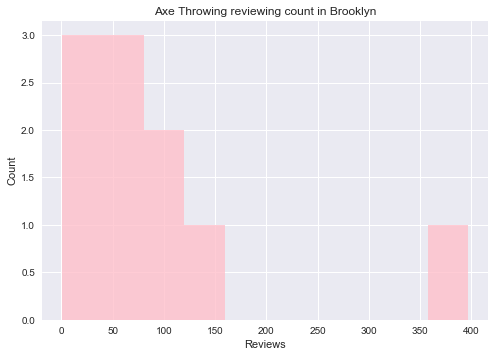

In [49]:
# you can do some analysis and visualization from here on! 

plt.hist(axe_throwing_df['review_count'], color='pink', alpha = 0.8)
plt.title('Axe Throwing reviewing count in Brooklyn')
plt.xlabel('Reviews')
plt.ylabel('Count')

In [63]:
# query the name of the axe throwing place with the highest review
axe_throwing_df.sort_values(by = 'review_count', ascending = False).name.reset_index(drop = True)[0]


'Kick Axe Throwing'

In [64]:
# can you do some other queries using sql/pandas?

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)